In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_decomposition
import seaborn as sns
import keras
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

from scipy import stats
import statsmodels.api as sm
from itertools import product
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('/content/drive/MyDrive/crypto-markets.csv')
# , parse_dates=['date'], index_col='date', date_parser=dateparse)
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crypto-markets.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [ ]:
print(df.info)

<bound method DataFrame.info of              slug symbol       name  ...        market  close_ratio   spread
0         bitcoin    BTC    Bitcoin  ...  1.488567e+09       0.5438     3.88
1         bitcoin    BTC    Bitcoin  ...  1.603769e+09       0.7813    13.49
2         bitcoin    BTC    Bitcoin  ...  1.542813e+09       0.3843    12.88
3         bitcoin    BTC    Bitcoin  ...  1.298955e+09       0.2882    32.17
4         bitcoin    BTC    Bitcoin  ...  1.168517e+09       0.3881    33.32
...           ...    ...        ...  ...           ...          ...      ...
942292  project-x  NANOX  Project-X  ...  1.622000e+03       0.5728  5441.80
942293  project-x  NANOX  Project-X  ...  1.823000e+03       0.9003  4449.20
942294  project-x  NANOX  Project-X  ...  1.913000e+03       0.8518  5347.00
942295  project-x  NANOX  Project-X  ...  1.788000e+03       0.4421  3124.52
942296  project-x  NANOX  Project-X  ...  1.654000e+03       0.5180  4046.07

[942297 rows x 13 columns]>


In [ ]:
#check for null values
df.isna()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,False,False,False,False,False,False,False,False,False,False,False,False,False
942293,False,False,False,False,False,False,False,False,False,False,False,False,False
942294,False,False,False,False,False,False,False,False,False,False,False,False,False
942295,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#count of null values in dataframe
df.isnull().sum().sum()

0

In [ ]:
df.dtypes

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

In [ ]:
#df['date'] = pd.to_datetime(df['date'])
#Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df.dtypes)

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
market                float64
close_ratio           float64
spread                float64
dtype: object


Text(0, 0.5, 'Close Price (USD)')

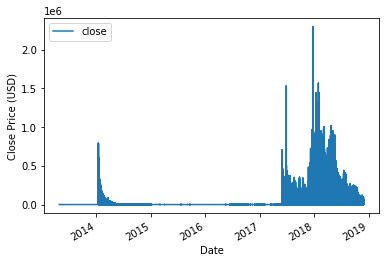

In [ ]:
ax = df.plot(x='date', y='close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


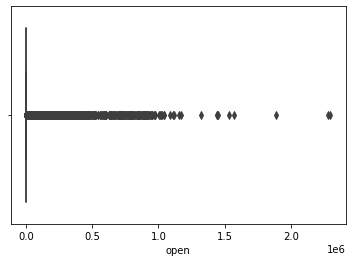

In [ ]:
#checking for outliers
sns.boxplot(df['open'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


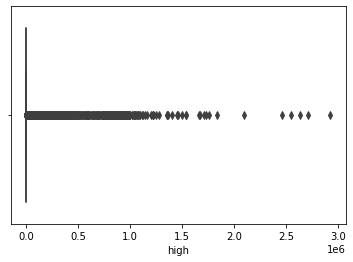

In [ ]:
sns.boxplot(df['high'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


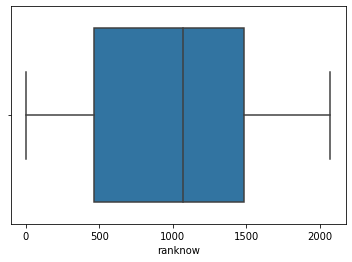

In [ ]:
sns.boxplot(df['ranknow'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


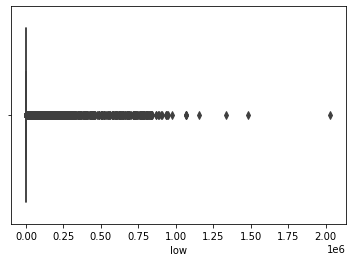

In [ ]:
sns.boxplot(df['low'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


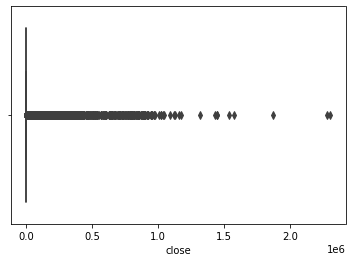

In [ ]:
sns.boxplot(df['close'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


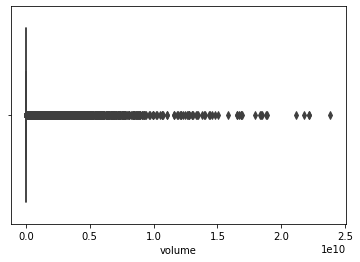

In [ ]:
sns.boxplot(df['volume'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


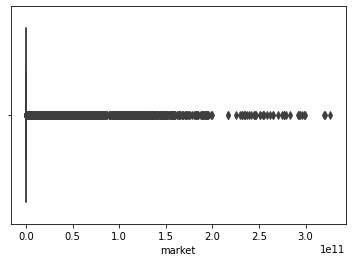

In [ ]:
sns.boxplot(df['market'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


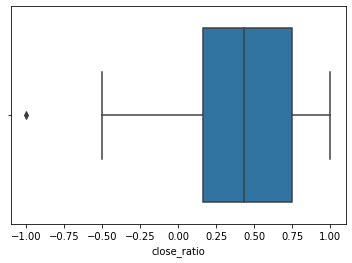

In [ ]:
sns.boxplot(df['close_ratio'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


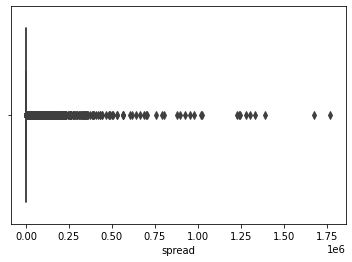

In [ ]:
sns.boxplot(df['spread'])

In [ ]:
df.shape

(942297, 13)

In [ ]:
#IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ranknow        1.019000e+03
open           2.245390e-01
high           2.482660e-01
low            2.023470e-01
close          2.236200e-01
volume         1.189150e+05
market         6.845066e+06
close_ratio    5.829000e-01
spread         3.000000e-02
dtype: float64


In [ ]:
# To see outliers
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

TypeError: ignored

In [ ]:
df_out= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

In [ ]:
#Normalization
scaler = MinMaxScaler()

close_price = df.close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [ ]:
scaled_close.shape

(942297, 1)

In [ ]:
np.isnan(scaled_close).any()

False

In [ ]:
scaled_close = scaled_close[~np.isnan(scaled_close)]

In [ ]:
np.isnan(scaled_close).any()

False

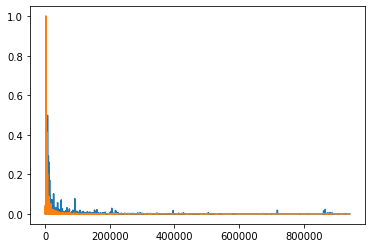

In [ ]:
#volume and marketcap trends
min_max_scaler = MinMaxScaler()
temp = min_max_scaler.fit_transform(df[["volume","market"]])
plt.plot(temp)

In [ ]:
# Get a df containing only the latest date's data for each currency
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
941284,42-coin,42,42-coin,2018-11-30,1228,23272.24,25082.69,21436.75,22665.93,308.0,951968.0,0.3371,3645.94
941749,bit20,BTWTY,Bit20,2018-11-30,1505,59697.89,59697.89,58616.07,59274.96,0.0,60223.0,0.6091,1081.82
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


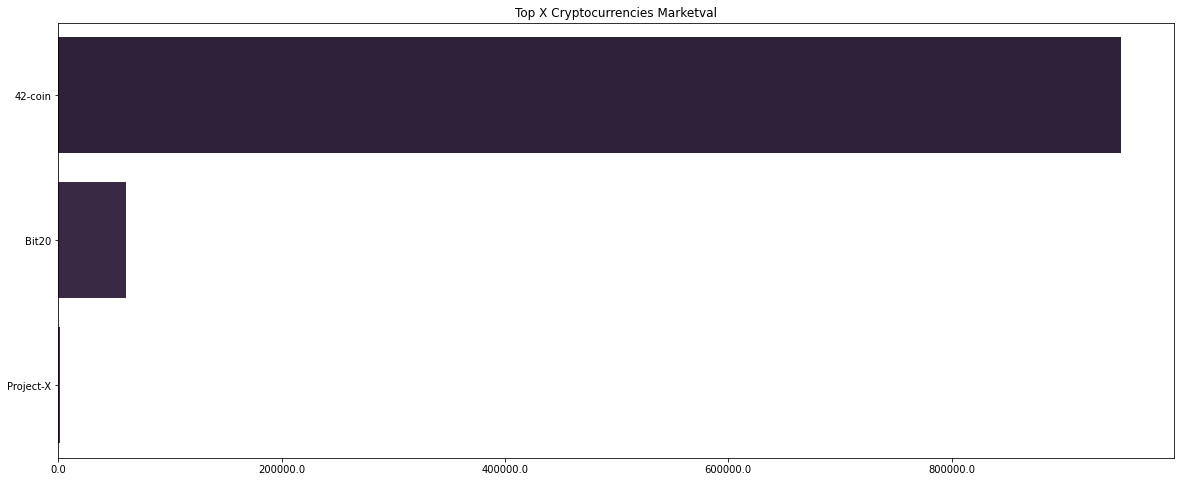

In [ ]:
##################################################################
# Get a list of the top x currencies
x=20 #default no of currencies we will look at
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

In [ ]:
# Convert date to real date
df['date'] = pd.to_datetime(df['date'])
df['market_billion'] = df['market'] / 1000000000
df['volume_million'] = df['volume'] / 1000000000
df['volume_billion'] = df['volume']

In [ ]:
wide_format = df.groupby(['date', 'name'])['close'].last().unstack()
wide_format.head(3)

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,8Bit,AB-Chain RTB,ABCC Token,AC3,ACChain,ACE (TokenStars),ACRE,AI Doctor,AICHAIN,ALAX,ALIS,ALLCOIN,ALQO,AMLT,AMO Coin,ANON,APIS,APOT,APR Coin,APX,ARBITRAGE,ARbit,ATBCoin,ATC Coin,ATLANT,ATMChain,ATN,AVINOC,AWARE,Absolute,...,Zurcoin,aXpire,adToken,adbank,aelf,bitBTC,bitCNY,bitEUR,bitGold,bitJob,bitSilver,bitUSD,bitqy,carVertical,dietbitcoin,district0x,doc.com Token,e-Gulden,eBitcoin,eBoost,empowr coin,eosBLACK,eosDAC,iBTC,iBank,iDealCash,iEthereum,iExec RLC,iQuant,iTicoin,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wide_format.shape
wide_format.describe()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,8Bit,AB-Chain RTB,ABCC Token,AC3,ACChain,ACE (TokenStars),ACRE,AI Doctor,AICHAIN,ALAX,ALIS,ALLCOIN,ALQO,AMLT,AMO Coin,ANON,APIS,APOT,APR Coin,APX,ARBITRAGE,ARbit,ATBCoin,ATC Coin,ATLANT,ATMChain,ATN,AVINOC,AWARE,Absolute,...,Zurcoin,aXpire,adToken,adbank,aelf,bitBTC,bitCNY,bitEUR,bitGold,bitJob,bitSilver,bitUSD,bitqy,carVertical,dietbitcoin,district0x,doc.com Token,e-Gulden,eBitcoin,eBoost,empowr coin,eosBLACK,eosDAC,iBTC,iBank,iDealCash,iEthereum,iExec RLC,iQuant,iTicoin,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
count,151.000000,471.000000,179.000000,141.000000,254.000000,928.000000,479.000000,1767.000000,100.000000,8.570000e+02,1318.000000,128.000000,38.000000,204.000000,270.000000,337.000000,120.000000,324.000000,318.000000,157.000000,414.000000,38.000000,375.000000,252.000000,74.000000,65.000000,191.000000,29.000000,204.000000,554.00000,126.000000,1215.000000,437.000000,260.000000,394.000000,422.000000,322.000000,115.000000,291.000000,28.000000,...,849.000000,309.000000,516.000000,300.000000,344.000000,1444.000000,1509.000000,1104.000000,1279.000000,380.000000,1234.000000,1490.000000,460.000000,312.000000,39.000000,484.000000,206.000000,1710.000000,395.000000,542.000000,128.000000,84.000000,227.000000,162.000000,610.000000,49.000000,399.000000,589.000000,434.000000,564.000000,419.000000,310.000000,52.000000,140.000000,109.000000,70.000000,321.000000,704.000000,79.000000,128.000000
mean,0.226043,0.755702,0.752177,0.011381,0.157538,0.004351,431.592610,16060.952332,0.038936,3.809788e-04,0.129704,0.030267,0.202524,0.122183,0.362287,0.218046,0.146124,0.037208,0.025589,0.011300,0.274770,0.014296,0.432423,0.030838,0.001833,0.346281,0.004878,0.073520,0.776758,7.50231,3.834603,0.003403,0.351465,0.294241,0.224488,0.009282,0.441954,0.011214,0.017380,0.029932,...,0.001349,0.033808,0.039295,0.009903,0.820933,3288.321170,0.155363,1.179564,1356.802963,0.032563,18.410292,1.025178,0.007942,0.002600,0.175647,0.064871,0.113487,0.049881,0.243243,0.184705,0.552334,0.172628,0.068473,0.008723,0.003349,0.000209,0.026504,0.847228,0.114430,17.412465,0.360473,0.045366,0.000025,0.993826,0.000855,0.104977,0.037280,0.229741,0.003067,0.021298
std,0.127666,0.456668,0.584787,0.009870,0.069175,0.005247,248.351083,46399.765311,0.017472,6.091416e-04,0.197293,0.010894,0.077530,0.105157,0.511660,0.216827,0.172591,0.035721,0.027015,0.007508,0.255922,0.001658,0.485841,0.017132,0.000292,0.214141,0.002147,0.026342,1.039515,2.82783,2.145264,0.003524,0.369442,0.439617,0.315887,0.011454,0.431334,0.006886,0.014612,0.011855,...,0.002050,0.022709,0.032276,0.007075,0.511189,4296.506617,0.042406,0.105726,167.994557,0.037727,3.269355,0.061695,0.011028,0.002768,0.278232,0.054326,0.092013,0.076395,0.339290,0.218052,1.206815,0.083725,0.062523,0.009359,0.003245,0.000078,0.025814,0.583527,0.117231,12.742364,0.403260,0.069530,0.000010,0.007638,0.000292,0.017982,0.035255,0.288677,0.000743,0.013511
min,0.077287,0.170806,0.271742,0.001886,0.057250,0.000098,112.650000,20.720000,0.018916,2.200000e-07,0.007803,0.015155,0.080323,0.012649,0.014170,0.021518,0.005355,0.004615,0.001016,0.002392,0.028463,0.011097,0.039978,0.006717,0.001235,0.094704,0.002236,0.031459,0.028309,2.49000,1.220000,0.000152,0.009239,0.006898,0.020254,0.000086,0.044192,0.002273,0.002519,0.011101,...,0.000012,0.008030,0.005471,0.001367,0.108249,180.900000,0.042337,0.852036,762.910000,0.003775,9.800000,0.496361,0.000200,0.000298,0.004278,0.011229,0.017334,0.000956,0.012231,0.020170,0.000006,0.044138,0.008956,0.001286,0.000331,0.000075,0.002684,0.185651,0.002967,2.260000,0.047550,0.003004,0.000010,0.956075,0.000365,0.048180,0.002447,0.002028,0.001306,0.004697
25%,0.142757,0.366899,0.428322,0.004956,0.102088,0.000407,216.820000,500.080000,0.025860,3.800000e-05,0.016888,0.024435,0.118033,0.037521,0.084640,0.070082,0.016959,0.010513,0.004851,0.005817,0.061912,0.013131,0.140806,0.019149,0.001647,0.191456

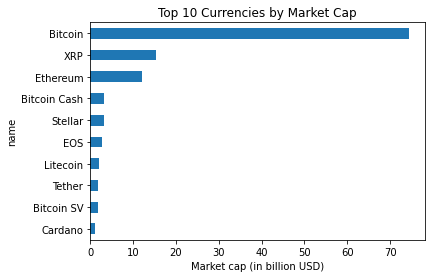

In [ ]:
ax = df.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

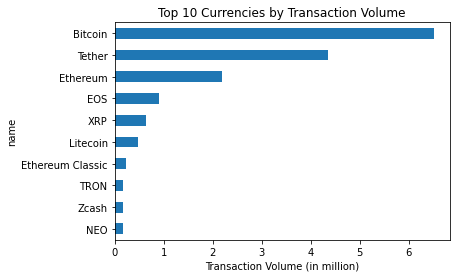

In [ ]:
ax = df.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [ ]:
top_5_currency_names = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,1.488567,0.0,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,1.603769,0.0,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,1.542813,0.0,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,1.298955,0.0,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,1.168517,0.0,0.0


In [ ]:
data_top_5_currencies.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
count,7270.000000,7270.000000,7270.000000,7270.000000,7270.000000,7.270000e+03,7.270000e+03,7270.000000,7270.000000,7270.000000,7270.000000,7.270000e+03
mean,2.524072,740.324172,764.995910,712.850212,740.762942,6.603901e+08,1.711709e+10,0.501333,52.145547,17.117085,0.660390,6.603901e+08
std,1.286099,2084.057395,2157.863990,1995.591173,2084.295486,1.837335e+09,3.675918e+10,0.310072,204.615336,36.759178,1.837335,1.837335e+09
min,1.000000,0.001352,0.001509,0.001227,0.001357,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,0.007888,0.008021,0.007713,0.007888,3.695968e+05,2.060429e+08,0.225425,0.000000,0.206043,0.000370,3.695968e+05
50%,2.000000,1.245000,1.345000,1.170000,1.245000,2.335450e+07,3.679885e+09,0.497600,0.170000,3.679885,0.023355,2.335450e+07
75%,4.000000,451.732500,462.620000,443.390000,451.910000,3.199230e+08,1.303912e+10,0.779500,18.992500,13.039123,0.319923,3.199230e+08
max,5.000000,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11,1.000000,4110.400000,326.502486,23.840899,2.384090e+10


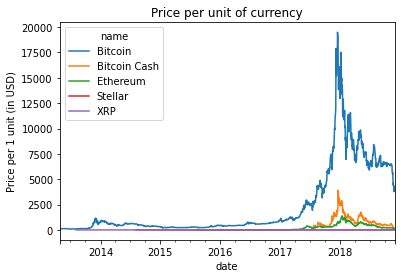

In [ ]:
ax = data_top_5_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

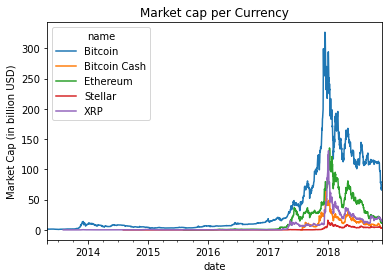

In [ ]:
ax = data_top_5_currencies.groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency");

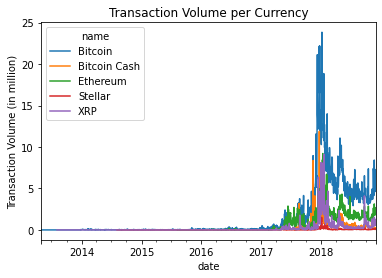

In [ ]:
ax = data_top_5_currencies.groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency");

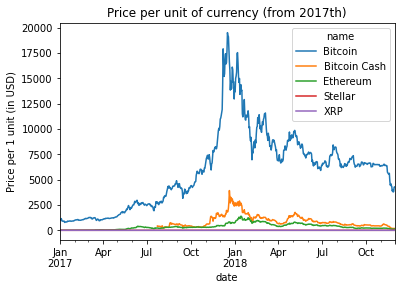

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency (from 2017th)");

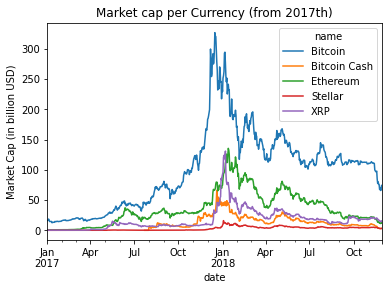

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency (from 2017th)");

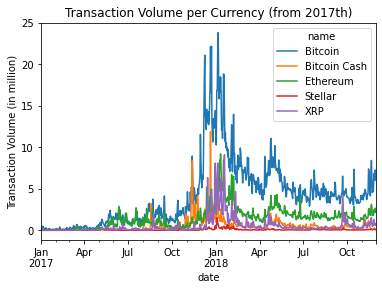

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency (from 2017th)");

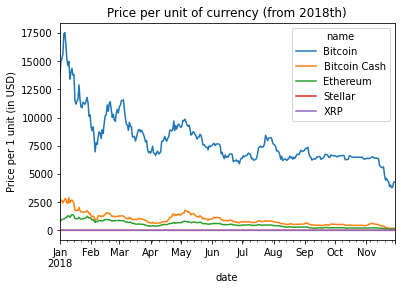

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency (from 2018th)");

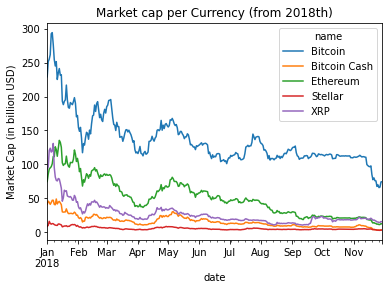

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['market_billion'].mean().unstack().plot();
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Market cap per Currency (from 2018th)");

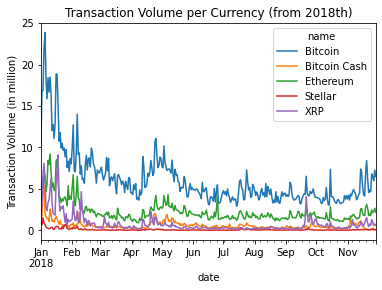

In [ ]:
ax = data_top_5_currencies[data_top_5_currencies.date.dt.year >= 2018].groupby(['date', 'name'])['volume_million'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per Currency (from 2018th)");

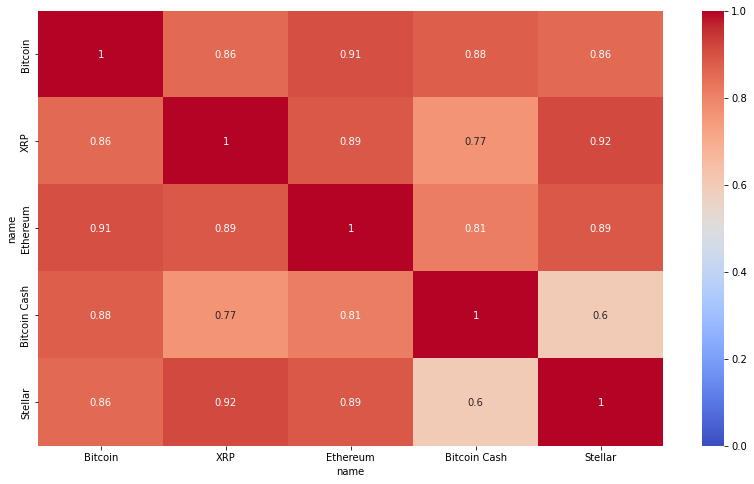

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(wide_format[top_5_currency_names].corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

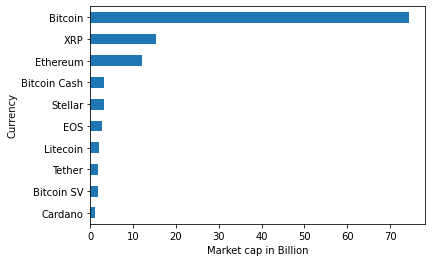

In [ ]:
is_bitcoin = df['symbol'] == 'BTC'
is_ethereum = df['symbol'] == 'ETH'
is_ripple  = df['symbol'] == 'XRP'

# Pull out a part of dataset that only has the most interesting currencies
data_top_currencies = df[is_bitcoin | is_ethereum | is_ripple]
#Let's chart out Top cryptocurrencies according to latest reported Market Cap
top10Currencies = df.groupby('name')['market_billion'].last().sort_values(ascending=False).head(10)
ax = top10Currencies.sort_values().plot(kind='barh')
ax.set_xlabel("Market cap in Billion");
ax.set_ylabel("Currency");

Text(0, 0.5, 'Price per 1 unit (in USD)')

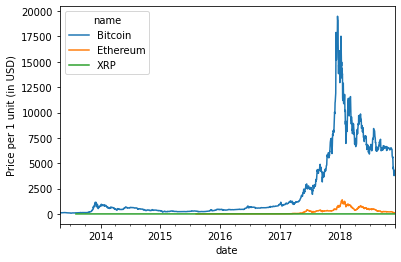

In [ ]:
#As we can see, and as it was expected, 
#Bitcoin has the highest market cap. Let's see the trend for couple of top currencies.
ax = data_top_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot()
ax.set_ylabel("Price per 1 unit (in USD)")

In [ ]:
closing_prices_bitcoin_and_ethereum = df[is_bitcoin | is_ethereum].groupby(['date','name'])['close'].last().unstack().reset_index()
closing_prices_other_currencies = df[df['name'].isin(top10Currencies.index) & ~is_bitcoin & ~is_ethereum].groupby(['date','name'])['close'].last().unstack().reset_index()

In [ ]:
def plot_with_textvalue(df):
    ax = df.plot(kind='bar')
    
    ax.set_ylabel("Yearly closing prices (in USD)")

    for rect in ax.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d$' % int(height), ha='center', va='bottom')

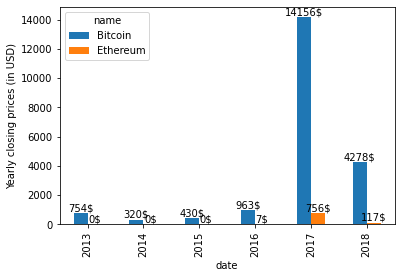

In [ ]:
yearly_closing_prices_bitcoin_and_ethereum = closing_prices_bitcoin_and_ethereum.groupby(closing_prices_bitcoin_and_ethereum.date.dt.year).last()
yearly_closing_prices_bitcoin_and_ethereum.drop(columns='date', inplace=True)
plot_with_textvalue(yearly_closing_prices_bitcoin_and_ethereum)

In [ ]:
top10Currencies

name
Bitcoin         74.451017
XRP             15.306739
Ethereum        12.166286
Bitcoin Cash     3.164359
Stellar          3.162026
EOS              2.738537
Litecoin         2.006242
Tether           1.851553
Bitcoin SV       1.714035
Cardano          1.085456
Name: market_billion, dtype: float64

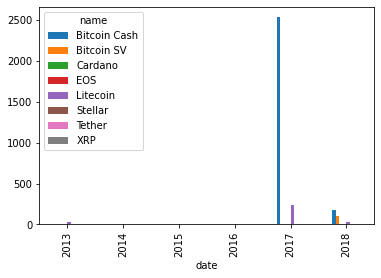

In [ ]:
yearly_closing_prices_other_currencies = closing_prices_other_currencies.groupby(closing_prices_other_currencies.date.dt.year).last()
yearly_closing_prices_other_currencies.drop(columns='date', inplace=True)
yearly_closing_prices_other_currencies.plot(kind='bar')

In [ ]:
closing_prices_other_currencies.head()

name,date,Bitcoin Cash,Bitcoin SV,Cardano,EOS,Litecoin,Stellar,Tether,XRP
0,2013-04-28,NaN,NaN,NaN,NaN,4.35,NaN,NaN,NaN
1,2013-04-29,NaN,NaN,NaN,NaN,4.38,NaN,NaN,NaN
2,2013-04-30,NaN,NaN,NaN,NaN,4.30,NaN,NaN,NaN
3,2013-05-01,NaN,NaN,NaN,NaN,3.80,NaN,NaN,NaN
4,2013-05-02,NaN,NaN,NaN,NaN,3.37,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Heatmap between Bitcoin and other top 5 Crypto')

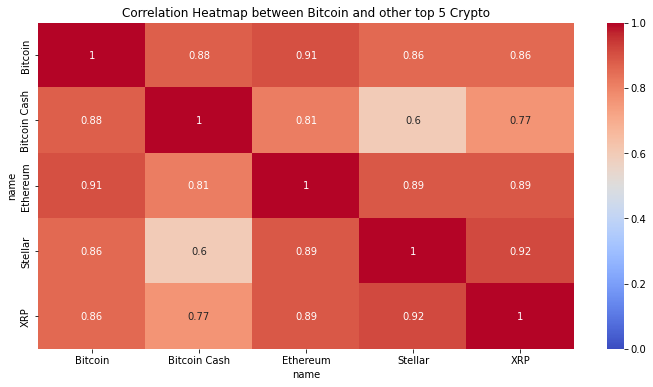

In [ ]:
top10Currencies = df.groupby('name')['market_billion'].last().sort_values(ascending=False).head(5)
closing_prices_top10 = df[df['name'].isin(top10Currencies.index)].groupby(['date', 'name'])['close'].mean().unstack()
closing_prices_top10.corr()

plt.figure(figsize=(12,6))
sns.heatmap(closing_prices_top10.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other top 5 Crypto')

Text(0.5, 1.0, 'Correlation Heatmap between Bitcoin and other top 4 Crypto')

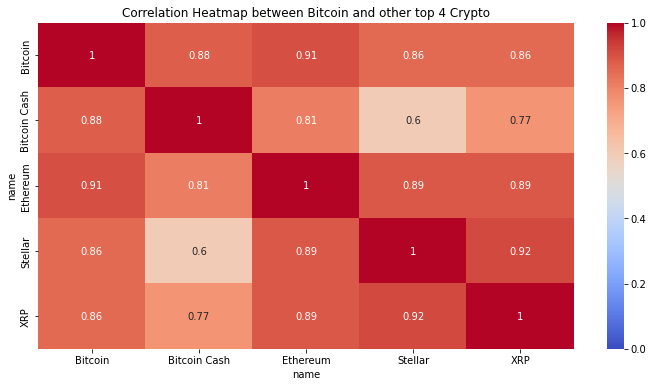

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(closing_prices_top10.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other top 4 Crypto')

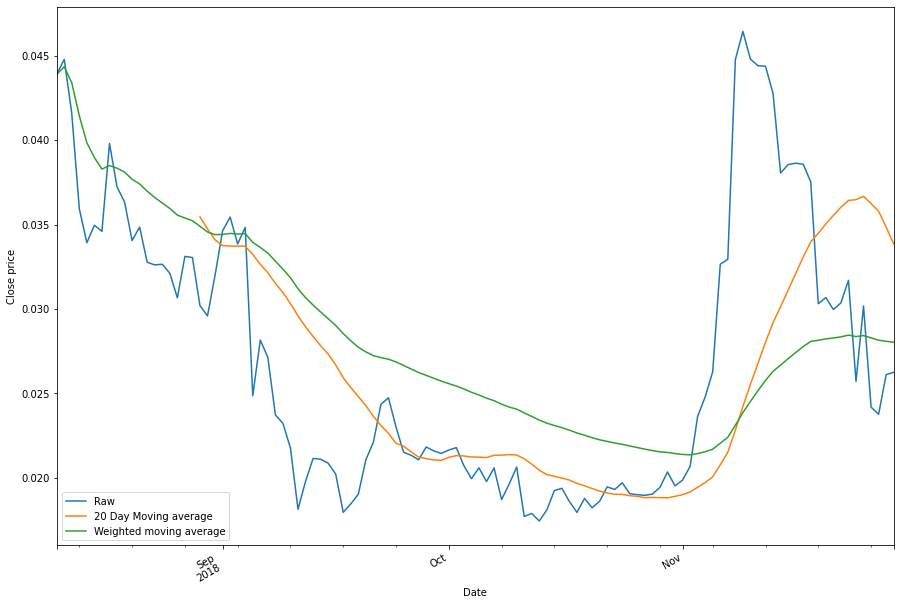

In [ ]:
#Moving averages
filtered_df = df[(df['ranknow']==1744) & (df['date']> (max(df['date']) - timedelta(days = 30*6))) ]
filtered_df.set_index('date',inplace = True)
filtered_df.head()
f,ax = plt.subplots(figsize=(15,11))

filtered_df.close.plot(label="Raw",ax=ax)
filtered_df.close.rolling(20).mean().plot(label="20 Day Moving average",ax = ax)
filtered_df.close.ewm(alpha = 0.03).mean().plot(label='Weighted moving average',ax=ax)


plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close price")
plt.show()

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df1 = df = pd.read_csv('/content/drive/MyDrive/crypto-markets.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)
df1.head()
btc=df1[df1['symbol']=='BTC']
btc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [ ]:
btc_month = btc.resample('M').mean()

Dickey–Fuller test: p=0.479048
Dickey–Fuller test: p=0.479017


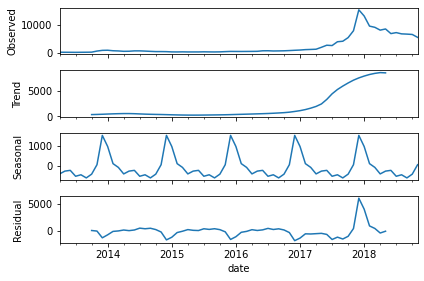

In [ ]:
btc_month['close_box'], lmbda = stats.boxcox(btc_month.close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])
#dickey fuller test - monthly forecasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
btc_month = btc.resample('M').mean()
seasonal_decompose(btc_month.close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close)[1])
plt.show()

Dickey–Fuller test: p=0.479048
Dickey–Fuller test: p=0.055750
Dickey–Fuller test: p=0.013221
Dickey–Fuller test: p=0.025730


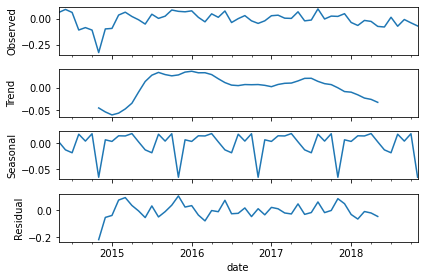

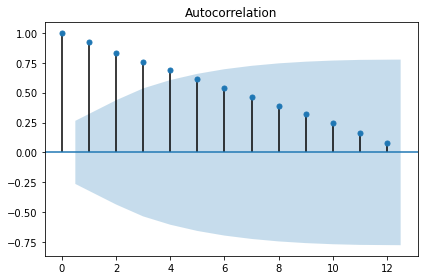

In [ ]:
#The p-value indicates that series is not stationary with 47.9% confidence.
#Lets use the Box-Cox transformation to suppress some of the variance.
btc_month['close_box'], lmbda = stats.boxcox(btc_month.close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])

btc_month['box_diff_seasonal_12'] = btc_month.close_box - btc_month.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

btc_month['box_diff_seasonal_3'] = btc_month.close_box - btc_month.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_3[3:])[1])

btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

plt.show()

#autocorrelation_plot(btc_month.close)
plot_acf(btc_month.close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

In [ ]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
3     (1, 0) -203.741317
1     (0, 1) -203.172577
4     (1, 1) -201.779306
6     (2, 0) -201.772400
2     (0, 2) -201.511342


In [ ]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:              close_box   No. Observations:                   68
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 103.871
Date:                Mon, 13 Dec 2021   AIC                           -203.741
Time:                        19:53:57   BIC                           -199.332
Sample:                    04-30-2013   HQIC                          -201.997
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3750      0.149      2.524      0.012       0.084       0.666
sigma2         0.0026      0.000     12.206      0.000       0.002       0.003
Ljung-Box (Q):                       20.67   Jarque-

In [ ]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


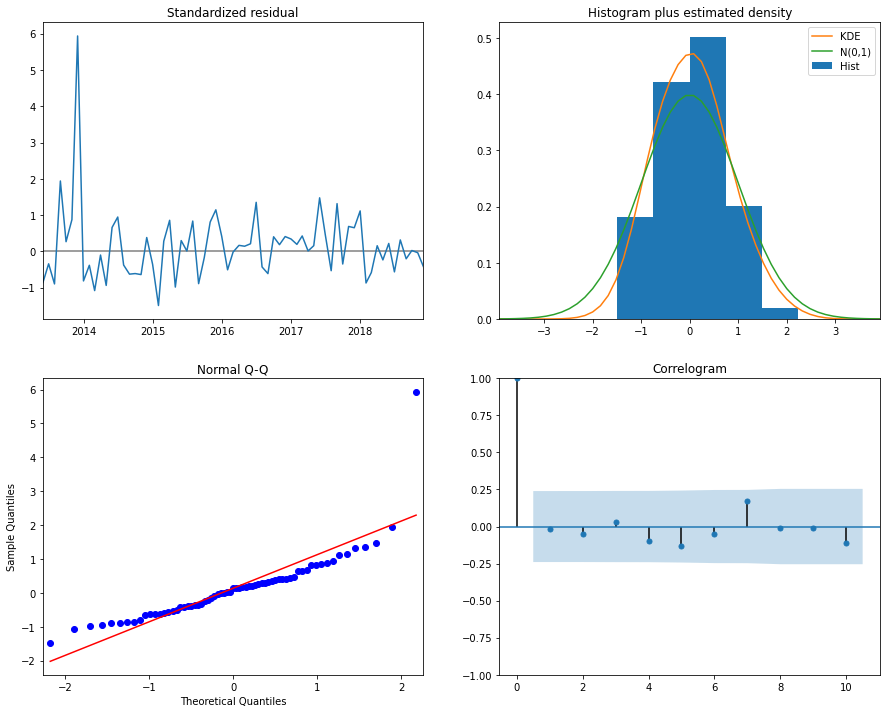

In [ ]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

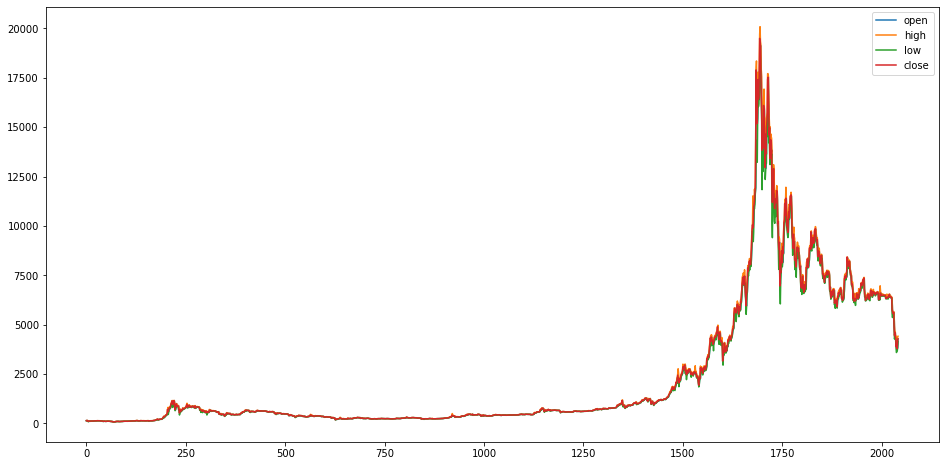

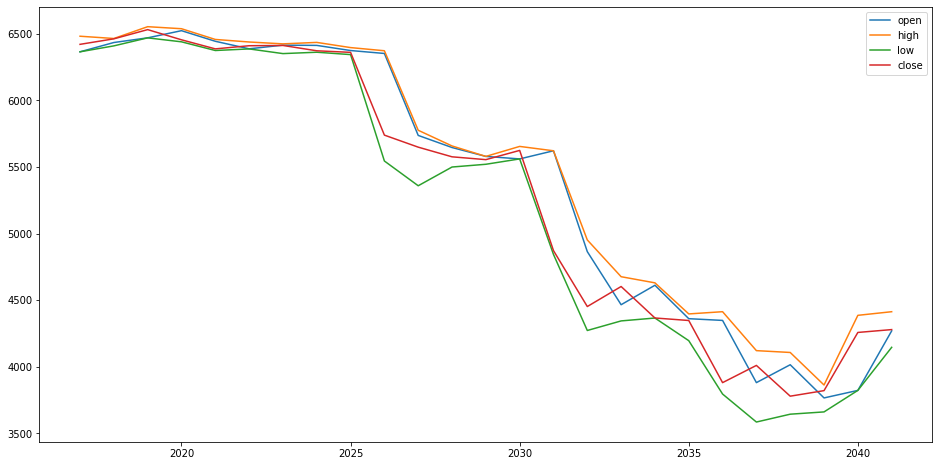

In [ ]:
# let us see the trends of Bitcoin price since 2013
df = pd.read_csv("/content/drive/MyDrive/crypto-markets.csv")
Bitcoin_price = df[df['name']=='Bitcoin']
Bitcoin_price[['open','high','low','close']].plot(figsize=(16,8))
plt.show()
#since 2017, the Bitcoin price has a rocket speed,let us see closer
Bitcoin_price1718 = df[df['name']=='Bitcoin'].loc['2017':]
Bitcoin_price1718[['open','high','low','close']].plot(figsize=(16,8))
plt.show()

In [ ]:
# # I'd like to know the top 10 rank coins
# df[df['ranknow'] <= 10].groupby('ranknow').name.unique()
# # then know more about the top 5 coins
# Bitcoin = df[df['name']=='Bitcoin'].loc['2017':]
# Ethereum = df[df['name']=='Ethereum'].loc['2017':]
# Ripple = df[df['name']=='Ripple'].loc['2017':]
# Bitcoin_cash = df[df['name']=='Bitcoin Cash'].loc['2017':]
# Cardano = df[df['name']=='Cardano'].loc['2017':]

# # draw pic of MarketCap
# plt.figure(figsize=(16,8))
# (Bitcoin['market']/1000000).plot(color='red', label='Bitcoin')
# (Ethereum['market']/1000000).plot(color='green', label='Ethereum')
# (Ripple['market']/1000000).plot(color='blue', label='Ripple')
# (Bitcoin_cash['market']/1000000).plot(color='yellow', label='Bitcoin Cash')
# (Cardano['market']/1000000).plot(color='pink', label='Cardano')
# plt.legend()
# plt.title('Top5 Cryptocurrency Market Cap (Million USD)')
# plt.show()

In [ ]:
# # draw pic or Volume
# plt.figure(figsize=(16,8))
# (Bitcoin['volume']/1000000).plot(color='red', label='Bitcoin')
# (Ethereum['volume']/1000000).plot(color='green', label='Ethereum')
# (Ripple['volume']/1000000).plot(color='blue', label='Ripple')
# (Bitcoin_cash['volume']/1000000).plot(color='yellow', label='Bitcoin Cash')
# (Cardano['volume']/1000000).plot(color='pink', label='Cardano')
# plt.legend()
# plt.title('Top5 Cryptocurrency Transactions Volume (Million Units)')
# plt.show()

In [ ]:
Bitcoin_price

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43


In [ ]:
#I'd like to try some prediction now. I guess my dream is to be a Chief Fortuneteller Officer. 
#steps:create new dataframe, add new feature, model fit and optimize
Bitcoin_price['mean'] = (Bitcoin_price['open'] + Bitcoin_price['high'] + Bitcoin_price['low'] + Bitcoin_price['close']) / 4
Bitcoin_price['prediction'] = Bitcoin_price['close'].shift(-30)
# drop columns I don't use this time.

# Bitcoin_price.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
Bitcoin_price

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,mean,prediction
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88,134.3975,129.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49,140.1175,132.3
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,140.9950,128.8
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,125.9000,129.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,109.8675,129.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,3899.1700,NaN
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,3886.3150,NaN
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,3777.6600,NaN
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43,4072.0650,NaN


In [ ]:
Bitcoin_price.drop(['slug','volume','symbol','name','ranknow','market','close_ratio','spread'],axis=1,inplace=True)
Bitcoin_price.tail() # just  check
#let us roll

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,open,high,low,close,mean,prediction
2037,2018-11-25,3880.78,4120.87,3585.06,4009.97,3899.170,NaN
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,3886.315,NaN
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,3777.660,NaN
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,4072.065,NaN
2041,2018-11-29,4269.00,4413.02,4145.77,4278.85,4276.660,NaN


In [ ]:
from sklearn import preprocessing
Bitcoin_price.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Bitcoin_price = Bitcoin_price.set_index('date')

In [ ]:
Bitcoin_price

,open,high,low,close,mean,prediction
date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,134.3975,129.00
2013-04-29,134.44,147.49,134.00,144.54,140.1175,132.30
2013-04-30,144.00,146.93,134.05,139.00,140.9950,128.80
2013-05-01,139.00,139.89,107.72,116.99,125.9000,129.00
2013-05-02,116.38,125.60,92.28,105.21,109.8675,129.30
...,...,...,...,...,...,...
2018-10-26,6468.44,6498.29,6449.61,6474.75,6472.7725,4009.97
2018-10-27,6480.84,6507.41,6453.53,6480.38,6480.5400,3779.13
2018-10-28,6482.66,6502.28,6447.91,6486.39,6479.8100,3820.72


In [ ]:
X = Bitcoin_price.drop('prediction',axis = 1)

In [ ]:
X

,open,high,low,close,mean
date,,,,,
2013-04-28,135.30,135.98,132.10,134.21,134.3975
2013-04-29,134.44,147.49,134.00,144.54,140.1175
2013-04-30,144.00,146.93,134.05,139.00,140.9950
2013-05-01,139.00,139.89,107.72,116.99,125.9000
2013-05-02,116.38,125.60,92.28,105.21,109.8675
...,...,...,...,...,...
2018-10-26,6468.44,6498.29,6449.61,6474.75,6472.7725
2018-10-27,6480.84,6507.41,6453.53,6480.38,6480.5400
2018-10-28,6482.66,6502.28,6447.91,6486.39,6479.8100


In [ ]:
X = preprocessing.scale(X)
y= Bitcoin_price['prediction']

In [ ]:
y

date
2013-04-28     129.00
2013-04-29     132.30
2013-04-30     128.80
2013-05-01     129.00
2013-05-02     129.30
               ...   
2018-10-26    4009.97
2018-10-27    3779.13
2018-10-28    3820.72
2018-10-29    4257.42
2018-10-30    4278.85
Name: prediction, Length: 2012, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.1,random_state =101)

In [ ]:
Bitcoin_price.dtypes

open          float64
high          float64
low           float64
close         float64
mean          float64
prediction    float64
dtype: object

Accuracy is:  88.43 %
The predicted price is:  449.22095000000155 The real price is: 424.28


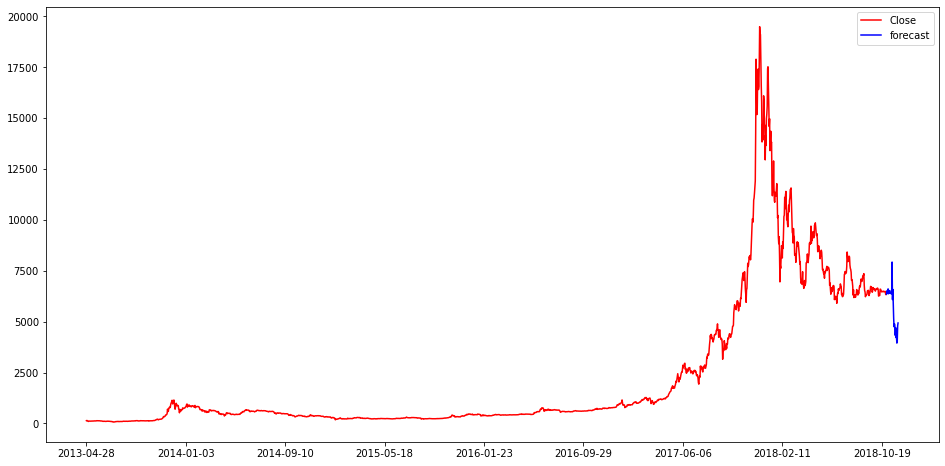

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 200,random_state = 101)
reg.fit(X_train,y_train)
accuracy = reg.score(X_test,y_test)
accuracy = accuracy*100
accuracy = float('{0:.2f}'.format(accuracy))
print ('Accuracy is: ',accuracy,'%')

preds = reg.predict(X_test)
print ('The predicted price is: ',preds[1],'The real price is:',y_test[1])
#So far,Accuracy looks good, predicted price sucks. C'est la vie and don't be fool or discouraged.
# It always happen in real world.

# Then, let us guess what will happen after 30 days?
X_30 =X[-30:]
forecast = reg.predict(X_30)

from datetime import datetime,timedelta
last_date = Bitcoin_price.iloc[-1].name
#last_date.to_datetime(df['date'], format='%Y-%m-%d')
last_date = datetime.strptime(last_date, '%Y-%m-%d').date()
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
Bitcoin_price=Bitcoin_price.append(df1)
Bitcoin_price.tail(30)
# In real world ,The price of Bitcoin reached 18870 in Dec.16th,my prediction is 18401;
# The next day,it went to 19458 in Dec.17th and my predicition is 18921;
# It looks smart.

#let us see what the baby looks like
Bitcoin_price['close'].plot(figsize=(16,8),label='Close',color = 'red')
Bitcoin_price['Forecast'].plot(label='forecast',color = 'blue')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Accuracy is:  71.91 %
The predicted price is:  448.32 The real price is: 424.28


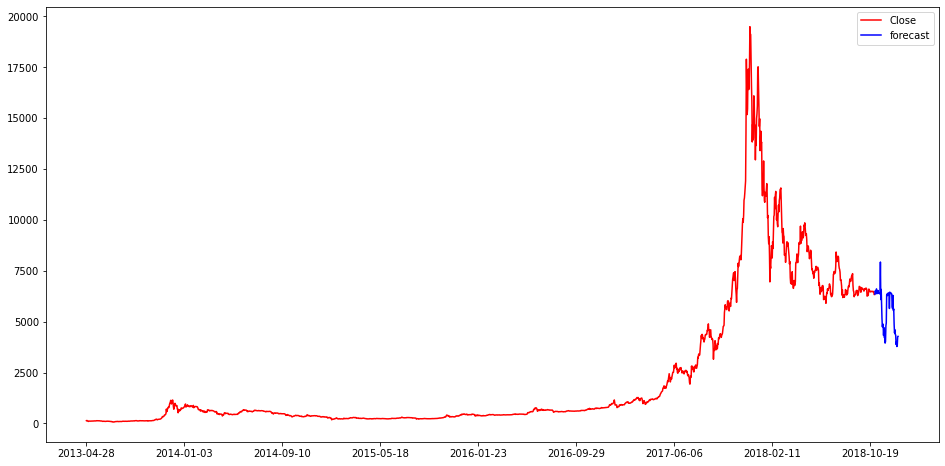

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0,criterion='mse', splitter='best')
regressor.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
accuracy = accuracy*100
accuracy = float('{0:.2f}'.format(accuracy))
print ('Accuracy is: ',accuracy,'%')

preds = regressor.predict(X_test)
print ('The predicted price is: ',preds[1],'The real price is:',y_test[1])
#So far,Accuracy looks good, predicted price sucks. C'est la vie and don't be fool or discouraged.
# It always happen in real world.

# Then, let us guess what will happen after 30 days?
X_30 =X[-30:]
forecast = regressor.predict(X_30)

from datetime import datetime,timedelta
last_date = Bitcoin_price.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
Bitcoin_price=Bitcoin_price.append(df1)
Bitcoin_price.tail(30)
# In real world ,The price of Bitcoin reached 18870 in Dec.16th,my prediction is 18401;
# The next day,it went to 19458 in Dec.17th and my predicition is 18921;
# It looks smart.

#let us see what the baby looks like
Bitcoin_price['close'].plot(figsize=(16,8),label='Close',color = 'red')
Bitcoin_price['Forecast'].plot(label='forecast',color = 'blue')
plt.legend()
plt.show()

In [ ]:
###XG BOOST
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
from datetime import datetime
from datetime import timedelta
from sklearn.ensemble import *
from sklearn.tree import *
sns.set()

In [ ]:
df_1 = df[df['symbol']=='BTC']
df_1.drop(['volume','symbol','name','ranknow','market'],axis=1,inplace=True)
df_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,slug,date,open,high,low,close,close_ratio,spread
0,bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.5438,3.88
1,bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.7813,13.49
2,bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.3843,12.88
3,bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.2882,32.17
4,bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.3881,33.32


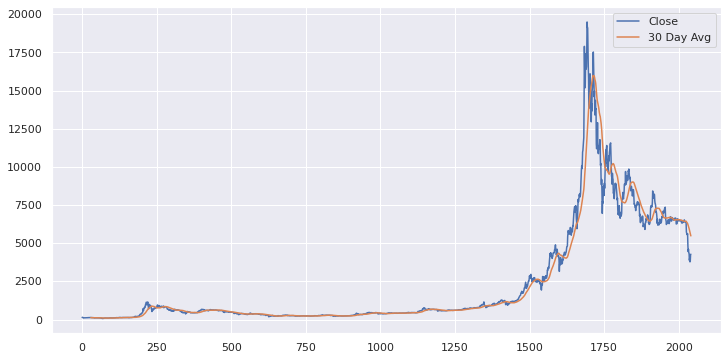

In [ ]:
df_1['close'].plot(figsize=(12,6),label='Close')
df_1['close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [ ]:
period = 30
minmax = MinMaxScaler().fit(df_1.iloc[:, 3].values.reshape((-1,1)))
close_normalize = minmax.transform(df_1.iloc[:, 3].values.reshape((-1,1)))
normalized = pd.DataFrame(close_normalize)
normalized['Price_After_period']=normalized[0].shift(-period)
normalized.dropna(inplace=True)
X=normalized.drop('Price_After_period',axis=1)
print(normalized.head())
y=normalized['Price_After_period']
print(X.head())
y.head()

          0  Price_After_period
0  0.003069            0.002799
1  0.003644            0.002899
2  0.003616            0.002882
3  0.003264            0.002765
4  0.002550            0.002759
          0
0  0.003069
1  0.003644
2  0.003616
3  0.003264
4  0.002550


0    0.002799
1    0.002899
2    0.002882
3    0.002765
4    0.002759
Name: Price_After_period, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,
                                                                y,
                                                                test_size=0.2,random_state=101)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train_X,train_Y)
preds = xg_reg.predict(test_X)

[19:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(test_Y, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.156572


In [ ]:
##### LSTM
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
51/51 [==============================] - 2s 10ms/step - loss: 0.0470 - val_loss: 0.0377
Epoch 2/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0369 - val_loss: 0.0321
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0336 - val_loss: 0.0306
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.0302
Epoch 5/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.0301
Epoch 6/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.0301
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0301
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0301
Epoch 9/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0325 - val_loss: 0.0301
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0300
Epoch 11

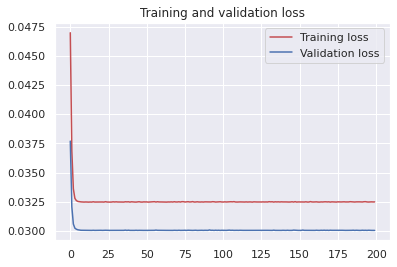

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)
train_predict.shape, test_predict.shape

((1609, 1), (403, 1))

In [ ]:
import math
from sklearn.metrics import *

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(train_Y,train_predict)))
print("Train data MSE: ", mean_squared_error(train_Y,train_predict))
print("Train data MAE: ", mean_absolute_error(train_Y,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,test_predict)))
print("Test data MSE: ", mean_squared_error(test_Y,test_predict))
print("Test data MAE: ", mean_absolute_error(test_Y,test_predict))

Train data RMSE:  0.1801755556834639
Train data MSE:  0.03246323086584501
Train data MAE:  0.13543227472324906
-------------------------------------------------------------------------------------
Test data RMSE:  0.17333390737526533
Test data MSE:  0.030044643445977064
Test data MAE:  0.13556791518006708


In [ ]:
### STACK XGB
from sklearn.ensemble import *
ada = AdaBoostRegressor(n_estimators=500, learning_rate=0.1)
bagging = BaggingRegressor(n_estimators=500)
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1)
rf = RandomForestRegressor(n_estimators=500, random_state=101)
dt = DecisionTreeRegressor(random_state=101)

In [ ]:
ada.fit(train_X, train_Y)
bagging.fit(train_X, train_Y)
gb.fit(train_X, train_Y)
rf.fit(train_X, train_Y)
dt.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=101)

In [ ]:
accuracy=dt.pr(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Random Forest Accuracy is:',accuracy,'%')

Random Forest Accuracy is: 79.0373 %


In [ ]:
accuracy=rf.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Random Forest Accuracy is:',accuracy,'%')

Random Forest Accuracy is: 86.8551 %


In [ ]:
accuracy=ada.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Adaptive Accuracy is:',accuracy,'%')

Adaptive Accuracy is: 84.445 %


In [ ]:
accuracy=bagging.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Bagging Accuracy is:',accuracy,'%')

Bagging Accuracy is: 86.6372 %


In [ ]:
accuracy=gb.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Gradient Boosting Accuracy is:',accuracy,'%')

Gradient Boosting Accuracy is: 83.2922 %


In [ ]:
ada_out = ada.predict(test_X)
bagging_out = bagging.predict(test_X)
gb_out = gb.predict(test_X)
rf_out = rf.predict(test_X)
dt_out = dt.predict(test_X)
# stack_predict = np.vstack([ada_out,bagging_out,gb_out,test_Y]).T
# corr_df = pd.DataFrame(stack_predict, columns=['ada','bagging','gb','test'])
# plt.figure(figsize=(10,5))
# sns.heatmap(corr_df.corr(), annot=True)
# plt.show()

In [ ]:
corr_df.head()

In [ ]:
corr_df.ada = minmax.inverse_transform(corr_df.ada.values.reshape((-1,1))).flatten()
corr_df.bagging = minmax.inverse_transform(corr_df.bagging.values.reshape((-1,1))).flatten()
corr_df.gb = minmax.inverse_transform(corr_df.gb.values.reshape((-1,1))).flatten()
corr_df.test = minmax.inverse_transform(corr_df.test.values.reshape((-1,1))).flatten()

In [ ]:
corr_df.head()

In [ ]:
import xgboost as xgb

params_xgd = {
    'max_depth': 7,
    'objective': 'reg:linear',
    'learning_rate': 0.033,
    'n_estimators': 10000
    }
clf = xgb.XGBRegressor(**params_xgd)
stack_train = np.vstack([ada.predict(train_X),
                           bagging.predict(train_X),
                           et.predict(train_X),
                           gb.predict(train_X),
                          rf.predict(train_X)]).T

stack_test = np.vstack([ada.predict(test_X),
                           bagging.predict(test_X),
                           et.predict(test_X),
                           gb.predict(test_X),
                          rf.predict(test_X)]).T

clf.fit(stack_train, train_Y, eval_set=[(stack_test, test_Y)], 
        eval_metric='rmse', early_stopping_rounds=20, verbose=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(clf, ax=ax)
plt.show()